# Homework 4:

## Comparing word vectors, and/or using principal component analysis to visualize them

There are two options for homework. You can do one or the other; there's no need to do both.

1. Option 1 is to create a doc-term matrix of words and *characters* (whereas in the lab notebook we did words and *movies*). Use the vocabulary-selection techniques we explored in the notebook. Then write code that allows the user to choose a word, and--given that word--finds the five words most closely related to it in character-space. Finally, test to see if this improves on our movie-space model of meaning. To do this in a slightly experimental way: choose five words, look at their associations in movie space, and in each case choose two words you would expect to see and don't. (Check to make sure whether those words are even in our vocabulary.) How many of the associations you expected (if any) do you find turning up when you select words that are close in character-space?

2. Option 2 is to use principal component analysis to explore the distribution of words. This will require transposing a matrix so that columns become rows, and vice-versa -- as shown below. Don't worry about grouping by movie; just develop a vocabulary using doc-frequency, and then use CountVectorizer to count those words for characters. Then transpose the (whole) doc-term matrix, and apply PCA to extract components for all the words. But since your graph will become unreadable if you try to plot and label all 5000 words, you might randomly select 100 to plot. The seaborn code examples below are a rough model of one way to label points, although you may find that you need to convert your PCA output into a DataFrame and pair it with an index of word labels for this method to work.

3. A third option mentioned in the lab notebook is to apply PCA to a wider range of movie genres and visualize the movies. I'm not sure I recommend this, though; when I tried it, results were hard to interpret.

In [33]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Transposing a data frame

You can delete these examples after you get your own code to work; no need to keep them in the homework .pdf.

We'll create a sample data frame.

In [16]:
example = pd.DataFrame({'battle': [1, 25, 19], 'fool': [12, 3, 4]}, index = ['As You Like It', 'Macbeth', 'Hamlet'])

In [17]:
example

,battle,fool
As You Like It,1,12
Macbeth,25,3
Hamlet,19,4


We can plot the rows in a space defined by two columns, and apply the titles in the index as labels. Note that +0.2 is just a way of putting the label slightly to the upper right of the point; you'll have to adjust that number if the scale of your x and y axes changes (probably make it much smaller).

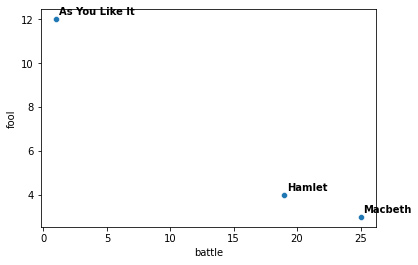

In [30]:
theplot = sns.scatterplot(data = example, x = 'battle', y = 'fool')

for idx, row in example.iterrows():
     theplot.text(row['battle'] + 0.2, row['fool'] + .2, 
     idx, horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

In [34]:
# The function that does the transposing is very complicated j/k

transposed = example.transpose()
transposed

,As You Like It,Macbeth,Hamlet
battle,1,25,19
fool,12,3,4


Now the rows are columns and the columns are rows. We can still choose two columns and plot the rows.

You'll need to transpose the doc-term matrix before applying PCA.

Once you've done PCA, you will only *have* two columns (components) to plot.

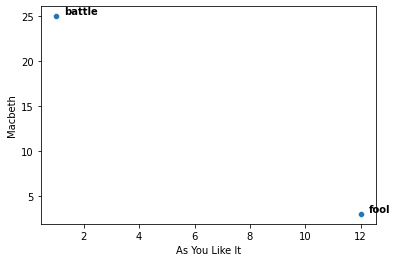

In [36]:
theplot = sns.scatterplot(data = transposed, x = 'As You Like It', y = 'Macbeth')

for idx, row in transposed.iterrows():
     theplot.text(row['As You Like It'] + 0.3, row['Macbeth'] + 0.2, 
     idx, horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
